# Import utilities module

In [1]:
from utility import *
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tyler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tyler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load and preprocess confessions dataset

In [2]:
path = '/Users/tyler/UCSD_Wellness/analysis/Final_Tyler/data/data1.csv'
confessions=pd.read_csv(path)

In [3]:
confessions['timestamp']=pd.to_datetime(confessions.timestamp)
confessions['weekday']=confessions.timestamp.dt.strftime('%a')
confessions['weekday']=pd.Categorical(confessions['weekday'],categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],ordered=True)

confessions.head()

,id,timestamp,content,contact,tags,note,weekday
0,14442,2019-10-12 17:05:24,I’m super excited for homecoming next weekend ...,NaN,NaN,NaN,Sat
1,14441,2019-10-12 13:22:03,"If I never met you, I would never have gotten ...",NaN,serious,NaN,Sat
2,14440,2019-10-11 17:03:50,There is an abnormal amount of hot girls that ...,NaN,NaN,NaN,Fri
3,14439,2019-10-11 15:58:00,"Just out of curiosity, on a scale of one to te...",NaN,NaN,NaN,Fri
4,14438,2019-10-10 19:10:20,To the person who was playing the trumpet outs...,NaN,wholesome,NaN,Thu


In [4]:
start = time.time();
clean_text(confessions['content'], './data/extra_clean_comments.txt')
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 0.8407697677612305 secs


In [5]:
extra_clean_txt_file = r"./data/extra_clean_comments.txt"
extra_clean_csv_file = r"extra_clean_comments.csv"

In [6]:
clean_confessions = txt_to_csv(extra_clean_txt_file, extra_clean_csv_file, header=None)
clean_content = clean_confessions[0].tolist()

# Load pos/neg lexicon

In [7]:
# This takes a while to run, load in the result in the cell below
# compute_pos_neg_scores(clean_content)

In [8]:
pkl_file = open('pn_lex_score.pkl', 'rb')
pn_lex_score = pickle.load(pkl_file)
pkl_file.close()

In [9]:
temp = pd.DataFrame.from_dict(pn_lex_score, orient='index', columns=['#POS', '#NEG'])
new_1 = pd.concat([confessions,temp],axis=1)

## Load in VAD analysis

In [10]:
#setup vars for VAD lexicon load
vad_text_file = r"./data/NRC-VAD-Lexicon.txt"
vad_csv_file = r"vad_lex.csv"
vad_lex = txt_to_csv(vad_text_file, vad_csv_file, header=0)

In [11]:
# This takes a while to run, load in the result in the cell below
# compute_VAD_scores(clean_content, vad_lex)

In [12]:
import pickle
import pandas as pd
pkl_file = open('all_VAD_scores.pkl', 'rb')
all_VAD_scores = pickle.load(pkl_file)
pkl_file.close()

In [13]:
temp_VAD = pd.DataFrame.from_dict(all_VAD_scores, orient='index', columns=['Valence','Arousal','Dominance'])
new = pd.concat([new_1,temp_VAD],axis=1)

# Load nltk Vader analysis

In [14]:
# This takes a while to run, load in the result in the cell below
# compute_nltk_vader_scores(clean_content)

In [15]:
pkl_file = open('all_nltk_vader_scores.pkl', 'rb')
all_nltk_vader_scores = pickle.load(pkl_file)
pkl_file.close()

In [16]:
nltk_vader = pd.DataFrame.from_dict(all_nltk_vader_scores, orient='index', columns=['neg','neu','pos','compound'])
nltk_vader.head()
df = pd.concat([new,nltk_vader],axis=1)

df['hour']=confessions.timestamp.dt.strftime('%H')
df.head()

,id,timestamp,content,contact,tags,note,weekday,#POS,#NEG,Valence,Arousal,Dominance,neg,neu,pos,compound,hour
0,14442,2019-10-12 17:05:24,I’m super excited for homecoming next weekend ...,NaN,NaN,NaN,Sat,6.0,1.0,12.933,16.362,7.857,0.107,0.597,0.295,0.9397,17
1,14441,2019-10-12 13:22:03,"If I never met you, I would never have gotten ...",NaN,serious,NaN,Sat,4.0,6.0,28.600,34.980,15.510,0.103,0.754,0.143,0.8731,13
2,14440,2019-10-11 17:03:50,There is an abnormal amount of hot girls that ...,NaN,NaN,NaN,Fri,3.0,1.0,4.270,4.900,4.370,0.000,0.757,0.243,0.7269,17
3,14439,2019-10-11 15:58:00,"Just out of curiosity, on a scale of one to te...",NaN,NaN,NaN,Fri,0.0,0.0,3.080,3.256,2.304,0.000,0.950,0.050,0.0258,15
4,14438,2019-10-10 19:10:20,To the person who was playing the trumpet outs...,NaN,wholesome,NaN,Thu,3.0,0.0,5.610,3.036,5.335,0.000,0.759,0.241,0.9072,19


In [17]:
df.to_csv(r'/Users/tyler/UCSD_Wellness/analysis/df_FULL_metrics.csv',index=False)

## Visualize VAD Scores across Week

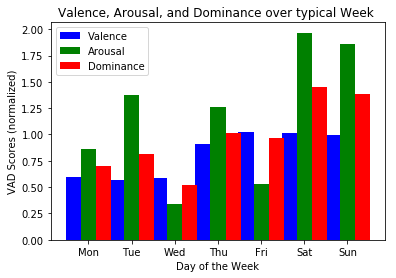

In [18]:
plot_vad_weekday_scores(new)

# Visualize nltk Vader across Week

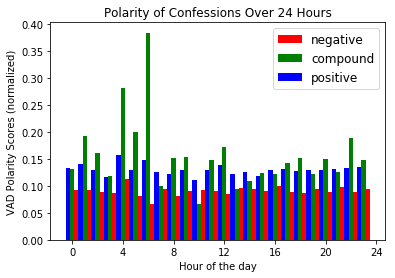

In [19]:
plot_nltk_vader_scores(df)

# Create pos/neg filtered dataframes

In [20]:
df_pos = df[df['compound'] > 0]
df_pos.to_csv(r'/Users/tyler/UCSD_Wellness/analysis/df_pos_filters.csv',index=False)

In [21]:
df_neg = df[df['compound'] < 0]
df_neg.to_csv(r'/Users/tyler/UCSD_Wellness/analysis/df_neg_filters.csv',index=False)

## Train a Word2Vec Model

In [22]:
num_features = 100    # Dimensionality of the hidden layer representation
min_word_count = 35
context = 8
downsampling = 1e-3
model = train_word2vec('extra_clean_comments.csv', num_features,min_word_count,context,downsampling)

2019-12-06 17:27:20,925 : INFO : collecting all words and their counts
2019-12-06 17:27:20,926 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-06 17:27:21,094 : INFO : collected 22487 word types from a corpus of 562667 raw words and 8215 sentences
2019-12-06 17:27:21,095 : INFO : Loading a fresh vocabulary
2019-12-06 17:27:21,104 : INFO : effective_min_count=35 retains 1341 unique words (5% of original 22487, drops 21146)
2019-12-06 17:27:21,106 : INFO : effective_min_count=35 leaves 485939 word corpus (86% of original 562667, drops 76728)
2019-12-06 17:27:21,111 : INFO : deleting the raw counts dictionary of 22487 items
2019-12-06 17:27:21,113 : INFO : sample=0.001 downsamples 70 most-common words
2019-12-06 17:27:21,114 : INFO : downsampling leaves estimated 323394 word corpus (66.6% of prior 485939)
2019-12-06 17:27:21,119 : INFO : estimated required memory for 1341 words and 100 dimensions: 1743300 bytes
2019-12-06 17:27:21,120 : INFO : resetting 

Training model...


2019-12-06 17:27:21,149 : INFO : training model with 8 workers on 1341 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=8
2019-12-06 17:27:21,422 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-12-06 17:27:21,427 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-12-06 17:27:21,428 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-12-06 17:27:21,429 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-12-06 17:27:21,430 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-12-06 17:27:21,433 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-12-06 17:27:21,436 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-12-06 17:27:21,438 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-12-06 17:27:21,439 : INFO : EPOCH - 1 : training on 562667 raw words (323589 effective words) took 0.3s, 1134350 effec

Total time: 1.6044628620147705 secs


In [23]:
Z = model.wv.syn0

/Users/tyler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


# Cluster and Visualize Word Clouds

In [24]:
centers, clusters = clustering_on_wordvecs(Z, 1);
centroid_map = dict(zip(model.wv.index2word, clusters));
top_words = get_top_words(model.wv.index2word, 30, centers, Z);

['speaking', 'rush', "too']", 'death', "friends']", "shit']", 'drinking', 'hearing', "mind']", 'killing', 'nut', 'poor', 'example', 'legit', 'positive', 'shows', 'stuck', 'sexy', 'pressure', "here']", 'alcohol', 'forward', 'plus', 'loving', 'note', 'considered', 'near', 'stress', 'building', 'photos']


/Users/tyler/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:276: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/Users/tyler/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:276: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/Users/tyler/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:625: RuntimeWarning: invalid value encountered in multiply
  inertia = (mindist * sample_weight).sum()
/Users/tyler/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
/Users/tyler/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:276: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/Users/tyler/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:276: RuntimeWarning:

rainbow


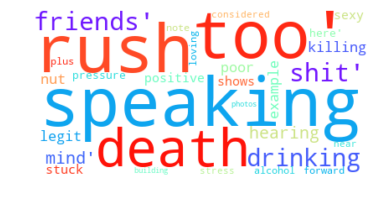

In [25]:
cmaps = 'rainbow'
for i in range(1):
    col = cmaps;
    print(col)
    display_cloud(i, col, top_words, label='total')

## Visualize similarity table

In [26]:
tags = ['stressed','sad','relationship','school' ]
tables = [];
for tag in tags:
    tables.append(get_word_table(model.wv.similar_by_word(tag), tag, show_sim=False))
    
similarity_table = pd.concat(tables, axis=1)
print(similarity_table)

     stressed        sad relationship    school
0   depressed        bad          sex      high
1     anxious   insecure     distance   classes
2      boring    feeling       having   quarter
3       quite      happy         lost   college
4    accepted    awkward          fwb      year
5    negative     guilty    boyfriend       gpa
6     healthy     scared     feelings    mental
7   potential     afraid         long       old
8        busy  depressed      serious  studying
9  frustrated     really      feeling    coming


## Demo of auto-tagging a new confession

In [27]:
## Define tags, load in new confession to be tagged.

confession = "I am having a really rough day, my girl just dumped with me, AND I failed an exam."

In [28]:
similarity_scores = compute_similarity_scores(confession, tags, model)
suggest_tags = generate_tag_suggestions(similarity_scores, tags, threshold=0.75)
print(suggest_tags)

['sad']
